Preamble


In [9]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split


print("\n---Libraries loaded")



---Libraries loaded


Data preparation

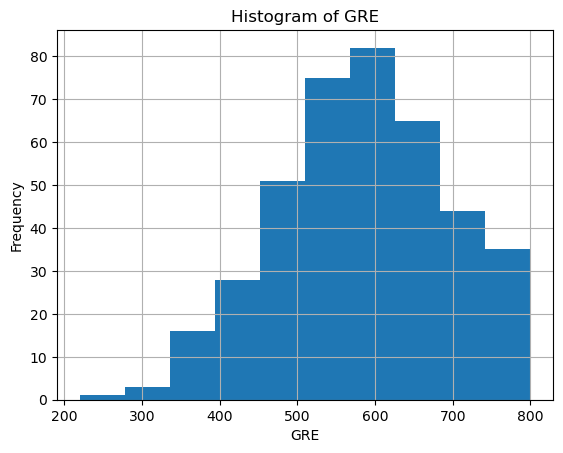

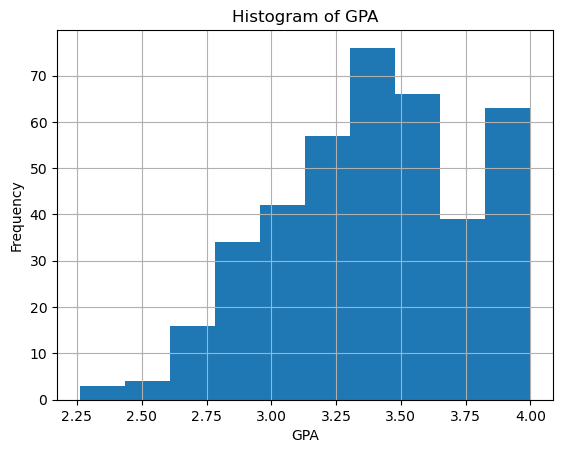

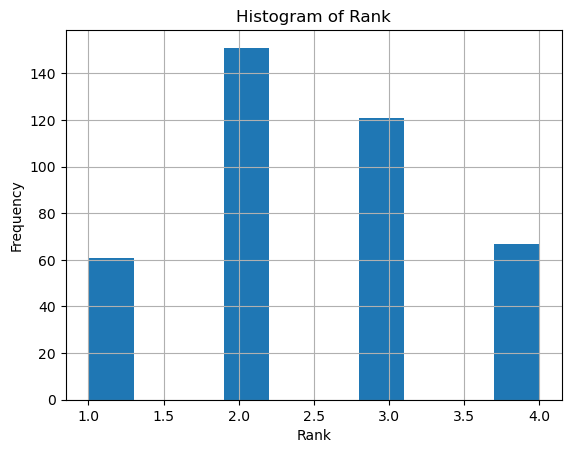

,admit,gre,gpa,rank_in_class
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [10]:
df = pd.read_csv('GRE.csv')

# the line below was moved from later in the script after the lecture was recorded. 
# The columns need to be renamed after splitting
df.columns = ['admit','gre', 'gpa', 'rank_in_class']


#Split into Train/Test Data
X = df.loc[:, df.columns != 'admit']
y = df.loc[:, df.columns == 'admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 

df.gre.hist()
plt.title('Histogram of GRE')
plt.xlabel('GRE')
plt.ylabel('Frequency')
plt.show()

df.gpa.hist()
plt.title('Histogram of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

# df.rank.hist()
# plt.title('Histogram of Rank')
# plt.xlabel('Rank')
# plt.ylabel('Frequency')
# plt.show()



df.rank_in_class.hist()
plt.title('Histogram of Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

df



Create model with statsmodels Logit

In [11]:
model = sm.Logit(y_train,X_train).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.580482
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                 0.07159
Time:                        21:28:11   Log-Likelihood:                -162.53
converged:                       True   LL-Null:                       -175.07
Covariance Type:            nonrobust   LLR p-value:                 3.604e-06
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
gre               0.0006      0.001      0.493      0.622      -0.002       0.003
gpa               0.

Odds ratio

In [12]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
print(model_odds)

                     OR       z-value      2.5%     97.5%
gre            1.000603  6.218499e-01  0.998208  1.003004
gpa            1.211776  4.144643e-01  0.763948  1.922123
rank_in_class  0.474925  6.380070e-07  0.354273  0.636666


Evaluation & Plot residuals


---Confusion Matrix
[[73  9]
 [29  9]]


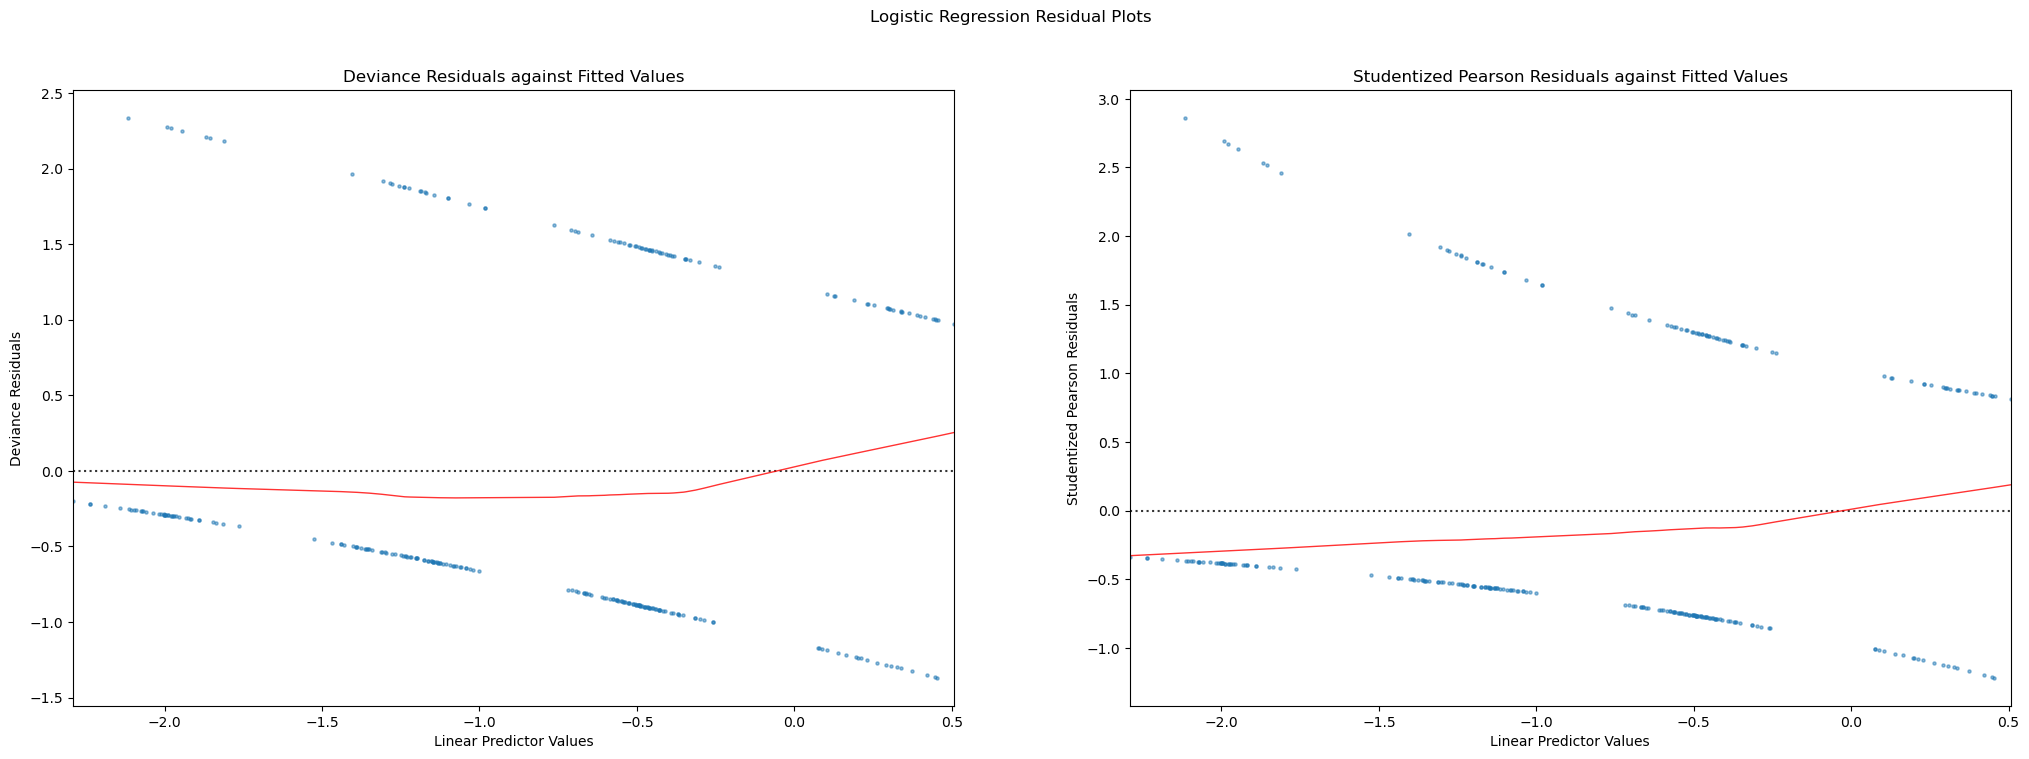

In [13]:
y_pred = np.round(model.predict(X_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(1,2, figsize=(25, 8))
plt.suptitle("Logistic Regression Residual Plots")

# Deviance residuals plot
sns.residplot(x=model.fittedvalues, 
              y=model.resid_dev, 
              ax=axL,
              data=df, 
              lowess=True, 
              scatter_kws={'alpha': 0.5, "s": 5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

axL.set_title("Deviance Residuals against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")


# Pearson residuals plot
sns.residplot(x=model.fittedvalues, 
              y=model.resid_pearson, 
              ax=axR,
              data=df, 
              lowess=True, 
              scatter_kws={'alpha': 0.5, "s": 5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

axR.set_title("Studentized Pearson Residuals against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

# save figure (for homework), or screen capture
plt.savefig('resid.png', transparent=True)

Create model with skLearn Logistic Regression fn

In [14]:

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Fit the Model with Sklearn
logreg = LogisticRegression(fit_intercept = True)    # default intercept = true
#logreg = LogisticRegression(fit_intercept = False)    

logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)

print("Modeling complete")

Modeling complete


Model evaluation

In [15]:
#Print Test Set Accuracy
print("\n---Test Set Accuracy")
print(logreg.score(X_test, y_test))

#Confusion Matrix
print("\n---Confusion Matrix")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Classification Report
print("\n---Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#An attempt at a regression model summary
print("\n---An attempt at a regression model summary")

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

      
regression_results(y_test, y_pred)


---Test Set Accuracy
0.7166666666666667

---Confusion Matrix
[[78  4]
 [30  8]]

---Classification Report
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        82
           1       0.67      0.21      0.32        38

    accuracy                           0.72       120
   macro avg       0.69      0.58      0.57       120
weighted avg       0.70      0.72      0.66       120


---An attempt at a regression model summary
explained_variance:  -0.0924
mean_squared_log_error:  0.1361
r2:  -0.3094
MAE:  0.2833
MSE:  0.2833
RMSE:  0.5323


ROC

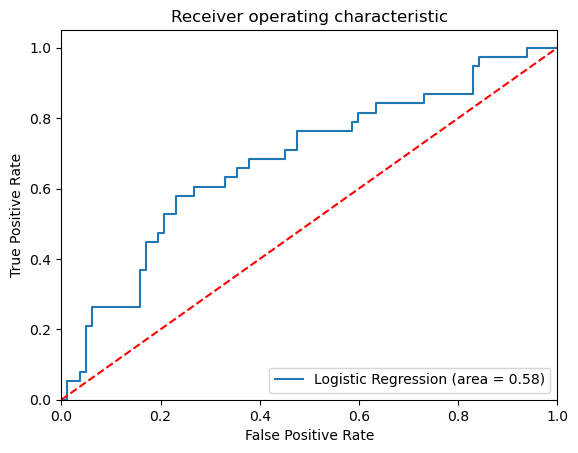

In [16]:
#Make the Roc Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC', transparent=True)
plt.show()

